### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a **business objective of improving overall sales performance by utilising customer trends**. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python


The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [78]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [79]:
# Load the CSV file(s) as reviews.
# Import the datasets
review = pd.read_csv('turtle_reviews.csv')
sales = pd.read_csv('turtle_sales.csv')

# View the DataFrame reviews.
print(review.head())
print(review.info())
review.describe()



   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [81]:
# View the DataFrame sales
print(sales.head())
print(sales.info())
sales.describe()

   Ranking  Product Platform    Year         Genre Publisher  NA_Sales  \
0        1      107      Wii  2006.0        Sports  Nintendo     34.02   
1        2      123      NES  1985.0      Platform  Nintendo     23.85   
2        3      195      Wii  2008.0        Racing  Nintendo     13.00   
3        4      231      Wii  2009.0        Sports  Nintendo     12.92   
4        5      249       GB  1996.0  Role-Playing  Nintendo      9.24   

   EU_Sales  Global_Sales  
0     23.80         67.85  
1      2.94         33.00  
2     10.56         29.37  
3      9.03         27.06  
4      7.29         25.72  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       352 non-null    int64  
 1   Product       352 non-null    int64  
 2   Platform      352 non-null    object 
 3   Year          350 non-null    float64
 4   Genre         352 no

,Ranking,Product,Year,NA_Sales,EU_Sales,Global_Sales
count,352.000000,352.000000,350.000000,352.000000,352.000000,352.000000
mean,1428.017045,3607.227273,2006.985714,2.515966,1.643778,5.334688
std,2743.580936,2360.239834,6.750343,3.409479,2.025752,6.264962
min,1.000000,107.000000,1982.000000,0.000000,0.000000,0.010000
25%,88.750000,1945.000000,2003.000000,0.477500,0.390000,1.115000
50%,176.500000,3340.000000,2009.000000,1.820000,1.170000,4.320000
75%,1439.750000,5435.750000,2012.000000,3.125000,2.160000,6.435000
max,16096.000000,9080.000000,2016.000000,34.020000,23.800000,67.850000


In [42]:
# two missing values in the sales dataset[Year] of sales
# fill missing values with the average value of the year sold. 
sales.fillna(sales.mean(), inplace=True)

#check the dataframe
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       352 non-null    int64  
 1   Product       352 non-null    int64  
 2   Platform      352 non-null    object 
 3   Year          352 non-null    float64
 4   Genre         352 non-null    object 
 5   Publisher     352 non-null    object 
 6   NA_Sales      352 non-null    float64
 7   EU_Sales      352 non-null    float64
 8   Global_Sales  352 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 24.9+ KB


## 2. Drop columns

In [82]:
# Drop unnecessary columns.
sales.drop('Platform', axis=1, inplace=True)
review.drop(['platform', 'language'], axis=1, inplace=True)

In [83]:
# View column names.
print(sales.info())
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       352 non-null    int64  
 1   Product       352 non-null    int64  
 2   Year          350 non-null    float64
 3   Genre         352 non-null    object 
 4   Publisher     352 non-null    object 
 5   NA_Sales      352 non-null    float64
 6   EU_Sales      352 non-null    float64
 7   Global_Sales  352 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 22.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)

## 3. Rename columns

In [84]:
# Rename the column headers.
sales = sales.rename(columns={'Ranking': 'ranking', 
                        'Product': 'product', \
                        'Year': 'year', \
                        'Genre': 'genre', \
                        'Publisher':'publisher',\
                        'NA_Sales': 'na_sales', \
                        'EU_Sales': 'eu_sales',\
                        'Global_Sales': 'global_sales'})
review = review.rename(columns={'remuneration (k£)': 'remuneration', \
                        'spending_score (1-100)': 'spending_score'})


# View column names.
print(sales.columns)
review.columns

Index(['ranking', 'product', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'global_sales'],
      dtype='object')


Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [85]:
#check for duplicate values in sales & review
print(sales.duplicated().unique())
print(review.duplicated().unique())

[False]
[False]


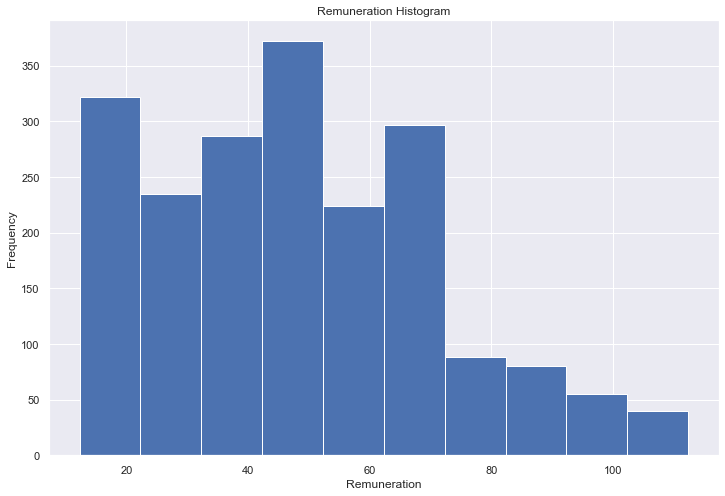

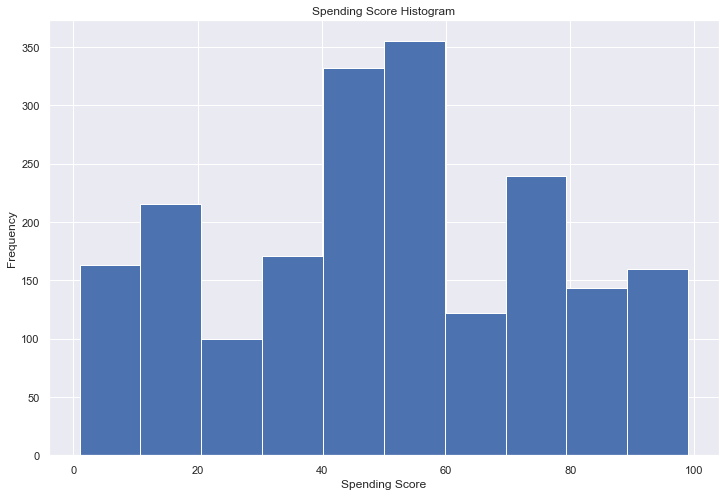

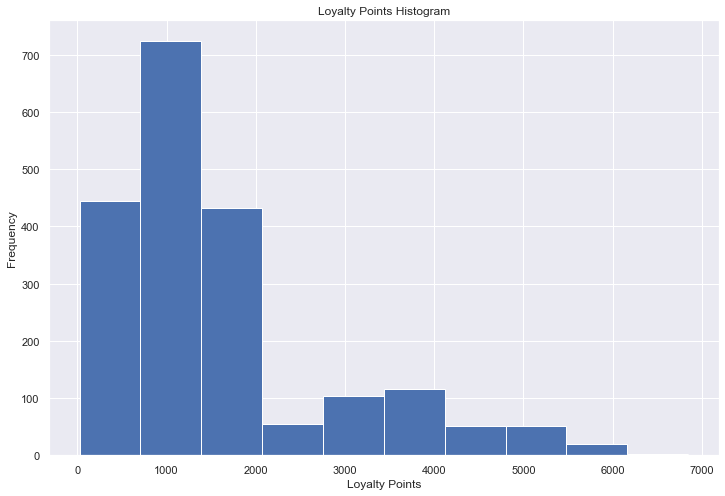

In [86]:
# check the data distribution
import matplotlib.pyplot as plt
import pandas as pd

# plot a histogram of 'remuneration'
plt.hist(review['remuneration'])
plt.title('Remuneration Histogram')
plt.xlabel('Remuneration')
plt.ylabel('Frequency')
plt.show()

# plot a histogram of 'spending_score'
plt.hist(review['spending_score'])
plt.title('Spending Score Histogram')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

# plot a histogram of 'loyalty_points'
plt.hist(review['loyalty_points'])
plt.title('Loyalty Points Histogram')
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')
plt.show()


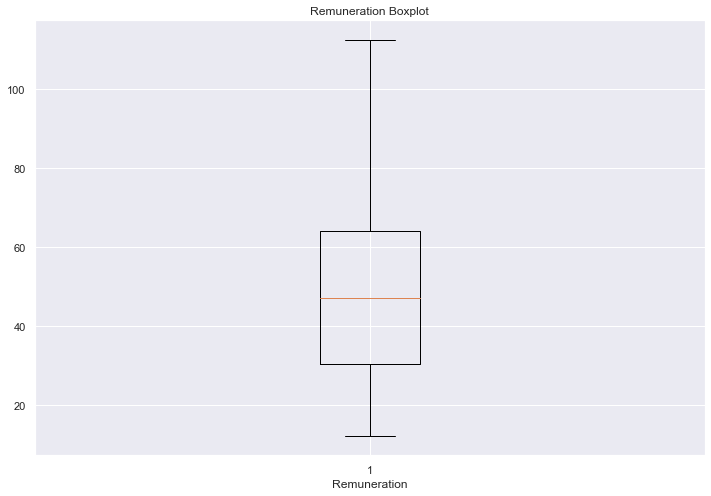

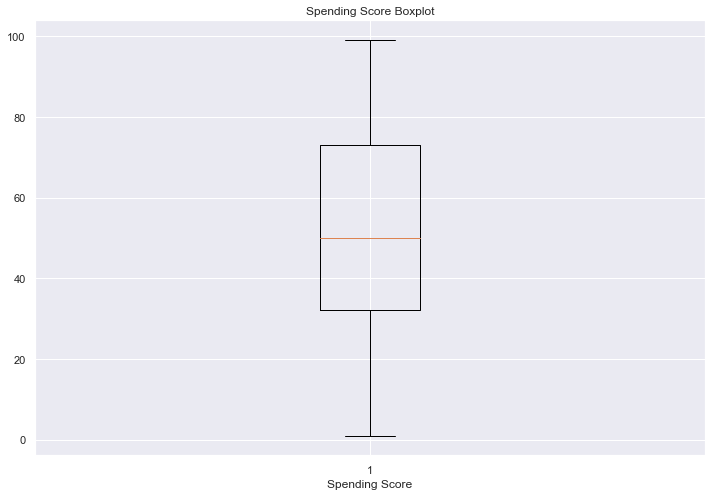

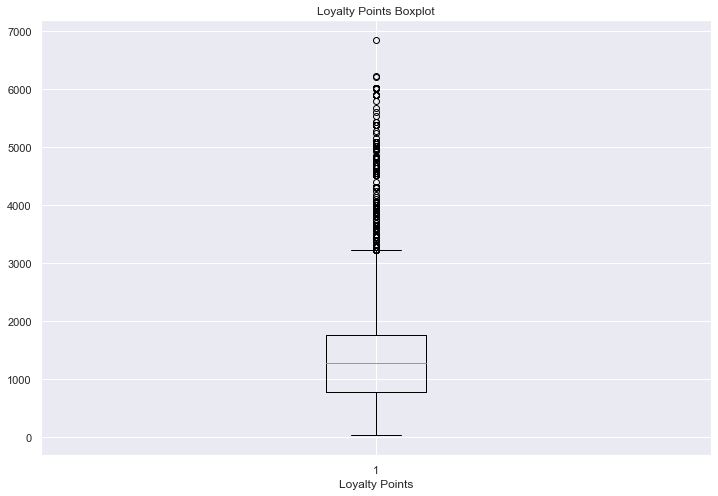

In [87]:
#check outliers in vareables of interest
import matplotlib.pyplot as plt
import pandas as pd

# plot a boxplot of 'remuneration'
plt.boxplot(review['remuneration'])
plt.title('Remuneration Boxplot')
plt.xlabel('Remuneration')
plt.show()

# plot a boxplot of 'spending_score'
plt.boxplot(review['spending_score'])
plt.title('Spending Score Boxplot')
plt.xlabel('Spending Score')
plt.show()

# plot a boxplot of 'loyalty_points'
plt.boxplot(review['loyalty_points'])
plt.title('Loyalty Points Boxplot')
plt.xlabel('Loyalty Points')
plt.show()


## 4. Save the DataFrame as a CSV file

In [88]:
# Create a CSV file as output.
sales.to_csv('sa.csv', index=False)
review.to_csv('rw.csv', index=False)

In [89]:
# Import new CSV file with Pandas.
rw = pd.read_csv('rw.csv')
sa = pd.read_csv('sa.csv')

# View the DataFrame reviews.
print(rw.head())
print(rw.info())
print(rw.describe())

# View DataFrame.
print(sa.head())
print(sa.info())
sa.describe()


   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  

,ranking,product,year,na_sales,eu_sales,global_sales
count,352.000000,352.000000,350.000000,352.000000,352.000000,352.000000
mean,1428.017045,3607.227273,2006.985714,2.515966,1.643778,5.334688
std,2743.580936,2360.239834,6.750343,3.409479,2.025752,6.264962
min,1.000000,107.000000,1982.000000,0.000000,0.000000,0.010000
25%,88.750000,1945.000000,2003.000000,0.477500,0.390000,1.115000
50%,176.500000,3340.000000,2009.000000,1.820000,1.170000,4.320000
75%,1439.750000,5435.750000,2012.000000,3.125000,2.160000,6.435000
max,16096.000000,9080.000000,2016.000000,34.020000,23.800000,67.850000


## 5. Linear regression

### 5a) spending vs loyalty

In [90]:
# Independent variable.
x = rw['spending_score'] 

# Dependent variable.
y = rw['loyalty_points']

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = rw).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        12:56:37   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An existing but weak correlation between spending_score and loyalty points. Perhaps not all clients are in the program or do not take advantage of special promotions yielding an outsized share of loyalty points ?

In [93]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [94]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * rw['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

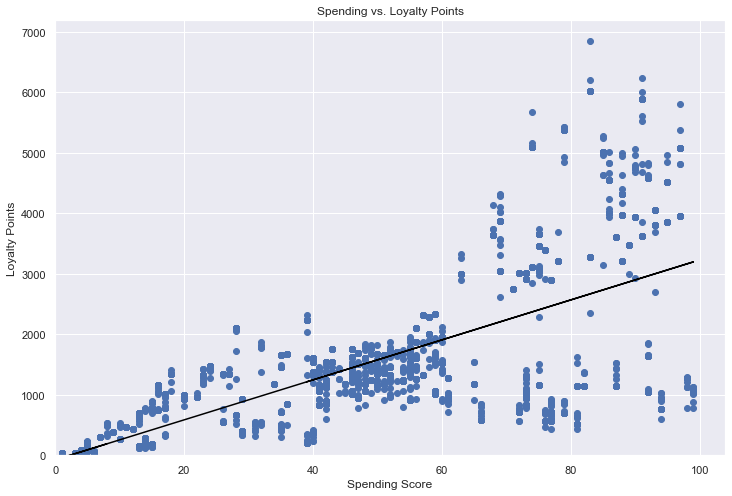

In [95]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y axis labels.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# Set the plot title.
plt.title('Spending vs. Loyalty Points')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) remuneration vs loyalty

In [96]:
# Independent variable.
x = rw['remuneration'] 

# Dependent variable.
y = rw['loyalty_points']

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = rw).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        12:57:08   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [98]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * rw['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

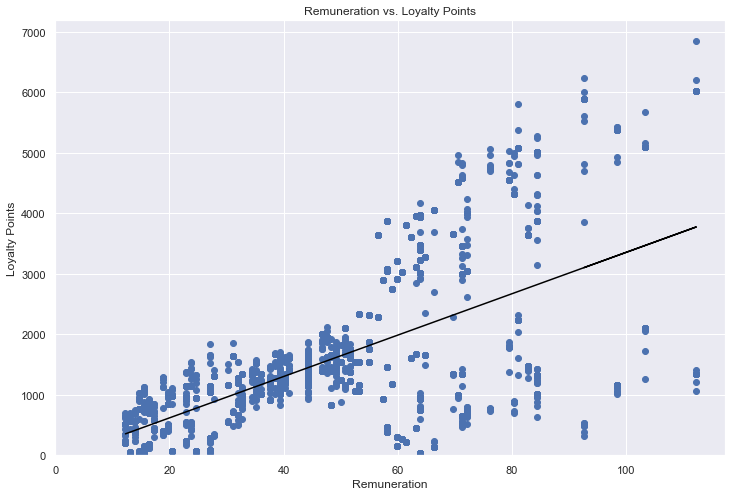

In [99]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y axis labels.
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

# Set the plot title.
plt.title('Remuneration vs. Loyalty Points')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [100]:
# Independent variable.
x = rw['age'] 

# Dependent variable.
y = rw['loyalty_points']

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = rw).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0577
Time:                        12:57:15   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [102]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * rw['age']

# View the output.
y_pred

0        549.694337
1        720.633462
2        686.445637
3        789.009112
4       1062.511712
           ...     
1995    1199.263012
1996    1404.389962
1997    1096.699537
1998    1096.699537
1999    1028.323887
Name: age, Length: 2000, dtype: float64

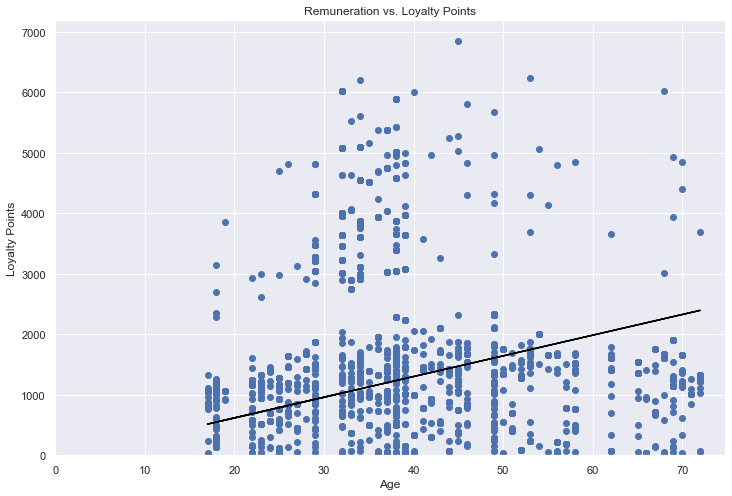

In [103]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y axis labels.
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# Set the plot title.
plt.title('Remuneration vs. Loyalty Points')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

#### Loyalty vs. Spending 
- Linear Correlations between loyalty and spending is significant with an **r2 = 0.452**, a **very low p value** and **low standard error** so the statistical significance of that relationship is high. **Conclusion**: The more people spend the more loyalty points they generate, an obvious conclusion. Due to a low r2, we see that this is not the entire story, there are other factors influenting the dependent variable loyalty, further investigation could reveal that.  
#### Loyalty vs. Remuneration 
- Linear Correlations between loyalty and remuneration has a lightly correlated relationship with and **r2 = .38**, a **very low p value** and **low standard error** makes this statistically significant or a value that we can trust. **Conclusion**: Customers that earn more will also spend a bit more on Turtle products. A low r value tells us that this is not the entire story as well (see above). 
#### Loyalty vs. Age
- Linear Correlations between loyalty and age has no significant correlation with an **r2 of roughly 0**. The statistical significance of that non-existant relationship is doubtful due to a **high p value of p> 0.05**. **Conclusion**: The data doesnt show any correlation between age and loyalty points. This tells us that people of all ages buy our products which is good news and gives us a broad customer base. It informs our marketing executives to not discriminate against age, that can happen in a supposedly "young" product category like games.


##### Normal distribution: 
Looking at the histograms, the data doesn't look normally distributed, but rather skewed left. This is to be expected in diverse and small-ish customer base as ours with a product line with a lot of variation of titles on offer and a complex decision process to get to a purchase. 

##### Oultliers
No outliers on spending and remuneration. a lot on Loyalty, however and only to the top of the distribution. It seems we have a lot of "superfans" that spend a lot or are great at maximizing points. A dedicated group of custoemrs that whould be kept happy. 

##### investigate relationship between variables further 
Looking at the scatterplot of the data we see that there could be dataclustering that we havent explored. We should also have a serious look on limitations of linear regression analysis and predictive methods. 

##### Homoscedasticity? 
likely present in spending, loyalty, , this impacts the statitstical significance of our linear regession analysis. 

##### would a multilinear regressional analysis make sense? 
not at this point, we have investigated the three key defined variables separately, a multilinear regression investigating all of them together would only give an aggregate picture. Once we have found all the independent variables impacting loyalty we could run a multilinar regression. A value close to r2=1 and a low p value & standart error would indicate that we found all the variables impacting hte loyalty score. - Note: has been done in the R part. 

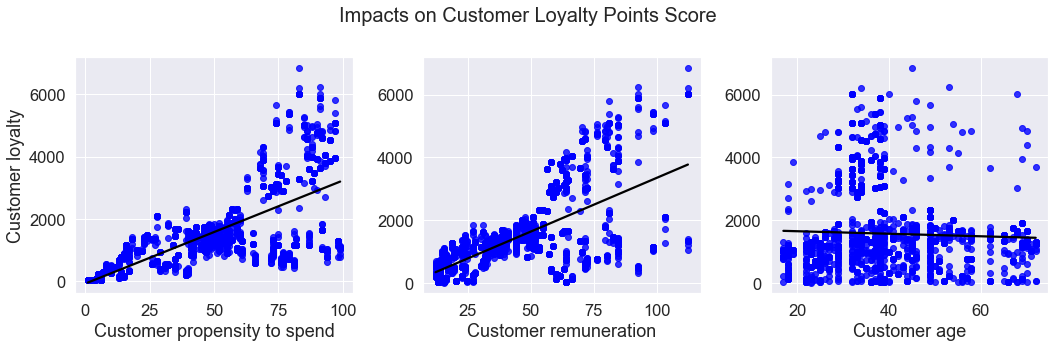

In [104]:
# summarize plots into one faceted plot for report
sns.set(style='darkgrid', font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# plot 1
sns.regplot(x='spending_score', y='loyalty_points', data=rw, ax=axes[0], color='black', ci=None, scatter_kws={'color':'blue'})
axes[0].set_xlabel("Customer propensity to spend", fontsize=18)
axes[0].set_ylabel("Customer loyalty", fontsize=18)

# plot 2
sns.regplot(x='remuneration', y='loyalty_points', data=rw, ax=axes[1], color='black', ci=None, scatter_kws={'color':'blue'})
axes[1].set_xlabel("Customer remuneration", fontsize=18)
axes[1].set_ylabel("", fontsize=18)

# plot 3
sns.regplot(x='age', y='loyalty_points', data=rw, ax=axes[2], color='black', ci=None, scatter_kws={'color':'blue'})
axes[2].set_xlabel("Customer age", fontsize=18)
axes[2].set_ylabel("", fontsize=18)

# add overall title
plt.suptitle("Impacts on Customer Loyalty Points Score", fontsize=20)

plt.tight_layout()

# save the plot at 150 DPI
plt.savefig('loyalty_points_plot.png', dpi=150)

plt.show()

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [105]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

   remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40


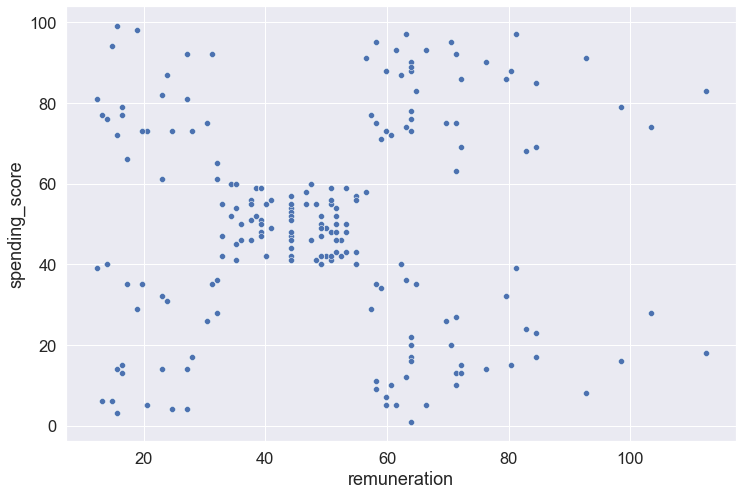

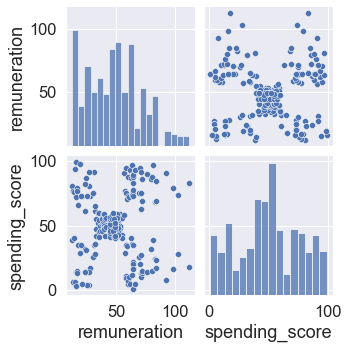

In [106]:
# Load sales.csv into a DataFrame
df = pd.read_csv('rw.csv')

# Create a new DataFrame containing only the remuneration and spending_score columns
df2 = df[['remuneration', 'spending_score']]

# Explore the new DataFrame
print(df2.head())

# Plot remuneration versus spending score
sns.scatterplot(data=df2, x='remuneration', y='spending_score')
plt.show()

sns.pairplot(df2)
plt.show()

## Determine the # of clusters

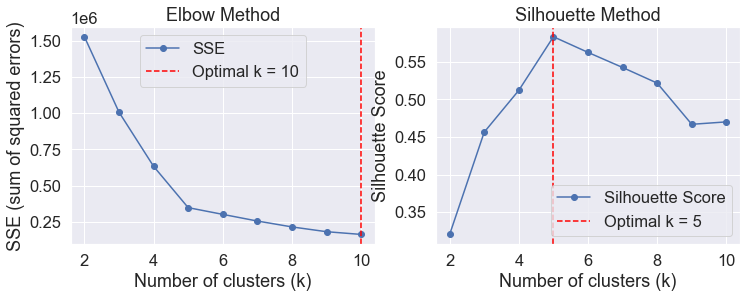

In [107]:
# Extract the features we want to cluster on
X = df2

# Define the range of k values to test
k_range = range(2, 11)

# Initialize empty lists to store the SSE (sum of squared errors) and silhouette scores for each k value
sse = []
silhouette_scores = []

# Iterate over each k value and fit the corresponding k-means model
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Append the SSE and silhouette score to their respective lists
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the SSE and silhouette scores against the number of clusters (k)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot SSE vs. k
ax[0].plot(k_range, sse, 'bo-')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('SSE (sum of squared errors)')
ax[0].set_title('Elbow Method')

# Plot silhouette score vs. k
ax[1].plot(k_range, silhouette_scores, 'bo-')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Method')

# Add vertical lines to mark the optimal number of clusters
optimal_k_sse = sse.index(min(sse)) + 2  # index starts at 0, so add 2 to get k value
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # index starts at 0, so add 2 to get k value
ax[0].axvline(x=optimal_k_sse, color='red', linestyle='--')
ax[1].axvline(x=optimal_k_silhouette, color='red', linestyle='--')

# Add legend
ax[0].legend(['SSE', 'Optimal k = {}'.format(optimal_k_sse)], loc='best')
ax[1].legend(['Silhouette Score', 'Optimal k = {}'.format(optimal_k_silhouette)], loc='best')

plt.show()


## 2. Plot

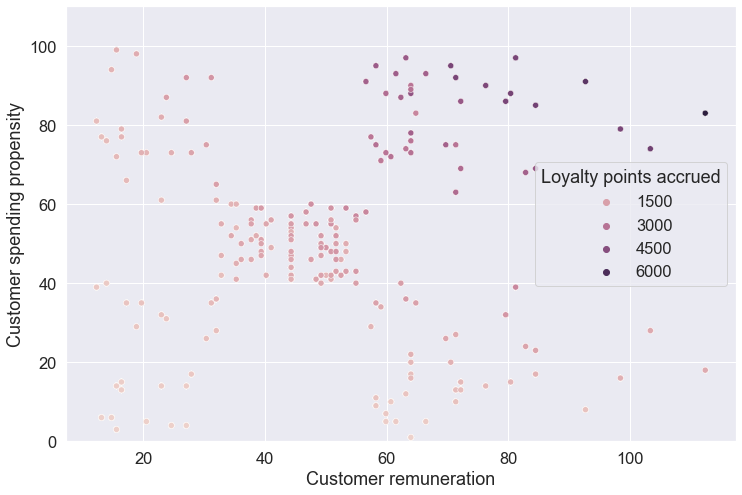

In [108]:
# Create a scatterplot with Seaborn.
from matplotlib import pyplot as plt
import seaborn as sns

# Set the y-axis limits to 0 and 110.
plt.ylim(0, 110)

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=rw,
                hue='loyalty_points')

# Update y-axis label
plt.ylabel('Customer spending propensity')

# Update x-axis label
plt.xlabel('Customer remuneration')

# Update legend title
plt.legend(title='Loyalty points accrued')


# save the plot at 150 DPI
plt.savefig('clusters_untidentfied.png', dpi=150)

## 4. Evaluate k-means model at different values of *k*

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64


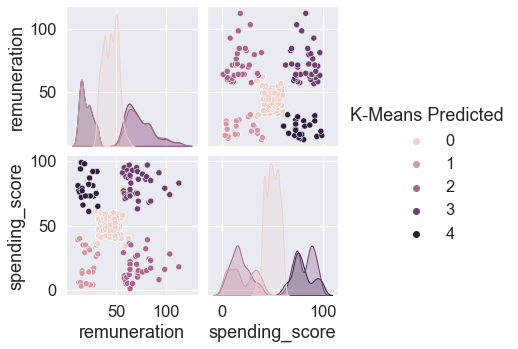

In [109]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Use five clusters.
kmeans = KMeans(n_clusters=5, 
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_

X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X,
             hue='K-Means Predicted',
             diag_kind='kde')

# Check the number of observations per predicted class.
print(X['K-Means Predicted'].value_counts())

**observations:** 
- Looking at these 5 clean clusters, its evident that 5 is the best fit. 

## 5. Fit final model and justify your choice
obsolete - see comment above

## 6. Plot and interpret the clusters

In [69]:
# Visualising the clusters.
# obsolete - see above

# View the DataFrame.
# obsolete - see below


In [110]:
# Check the number of observations per predicted class.
print(X['K-Means Predicted'].value_counts())

# View the K-Means predicted.
X.head()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64


,remuneration,spending_score,K-Means Predicted
0,12.30,39,1
1,12.30,81,4
2,13.12,6,1
3,13.12,77,4
4,13.94,40,1


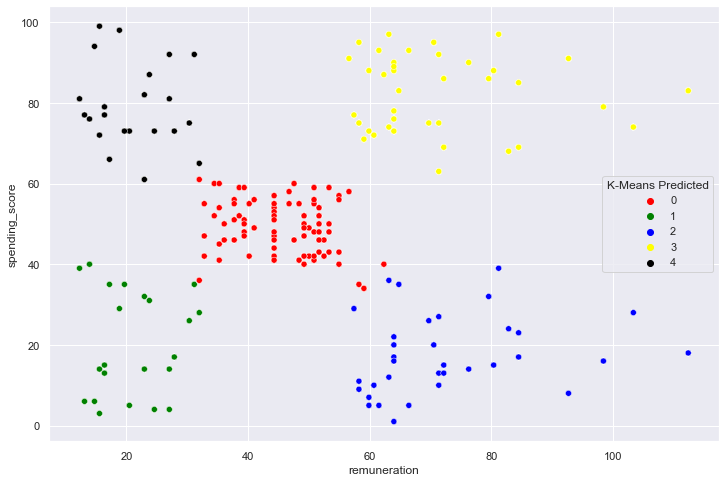

In [111]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=X,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'black'])

# save the plot at 150 DPI
plt.savefig('Customer_clusters.png', dpi=150)

In [112]:
# Rename the clusters
# create a dictionary to map the old values to new values
new_values = {
    0: 'Average customer',
    1: 'Occasional, low-income customer',
    2: 'Occasional, wealthy customer',
    3: 'Dedicated, wealthy customer',
    4: 'Dedicated, low-income customer'
}

# replace the old values with the new values using the dictionary
X['K-Means Predicted'] = X['K-Means Predicted'].replace(new_values)

# print the updated DataFrame 'x'
print(X)

      remuneration  spending_score                K-Means Predicted
0            12.30              39  Occasional, low-income customer
1            12.30              81   Dedicated, low-income customer
2            13.12               6  Occasional, low-income customer
3            13.12              77   Dedicated, low-income customer
4            13.94              40  Occasional, low-income customer
...            ...             ...                              ...
1995         84.46              69      Dedicated, wealthy customer
1996         92.66               8     Occasional, wealthy customer
1997         92.66              91      Dedicated, wealthy customer
1998         98.40              16     Occasional, wealthy customer
1999         92.66               8     Occasional, wealthy customer

[2000 rows x 3 columns]


## 7. Discuss: Insights and observations


The clustering analysis reveals five types of customers. 
- 0: 'average gamer'
- 1: 'dedicated, wealthy gamer' 
- 2: 'occasional, wealthy gamer' 
- 3: 'occasional, low-income gamer' 
- 4: 'dedicated, low-income gamer'

Cluster 0, the largest group makes most of our revenue and needs to be tended to well. potentially there are broad measures/actions we can take that can increase their spending. However, that requires further insights int their customer experience. We also should have a closer look at clusters 3 & 4 and 1 & 2 and compare them very closely to find out what the differentiating factors are in terms of customer experience is. If identified, we could derive actions to turn occasional into dedicated gamers. 


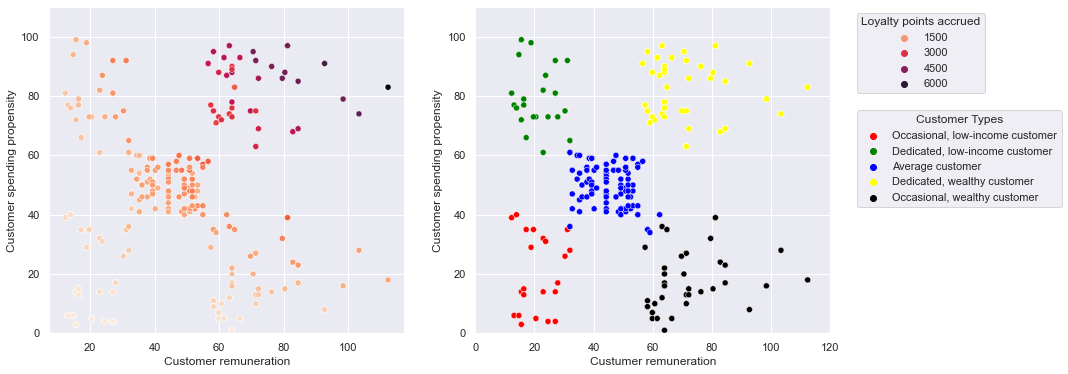

In [113]:
# plot both culster plots side by side for report
# Set plot size.
sns.set(rc={'figure.figsize': (14, 6)})

# Create subplots.
fig, axes = plt.subplots(nrows=1, ncols=2)

# Create a custom color map.
cmap = sns.color_palette("rocket_r", as_cmap=True)

# Plot 1.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=rw,
                hue='loyalty_points',
                palette=cmap,
                ax=axes[0])

# Update axis
axes[0].set_ylabel('Customer spending propensity')
axes[0].set_xlabel('Customer remuneration')
axes[0].set_ylim(0, 110)

# Update legend title
axes[0].legend(title='Loyalty points accrued', bbox_to_anchor=(2.65, 1))

# Plot 2.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=X,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'black'],
                ax=axes[1])

# Set custom axis limits
axes[1].set_ylim(0, 110)
axes[1].set_xlim(0, 120)

# Set the x and y axis labels.
axes[1].set_xlabel("Custumer remuneration")
axes[1].set_ylabel("Customer spending propensity")

# Move the legend to the right.
axes[1].legend(title='Customer Types', bbox_to_anchor=(1.06, 0.7), loc='upper left')

# Save the plot at 150 DPI.
plt.savefig('clusters.png', dpi=150)

# Show the plot.
plt.show()


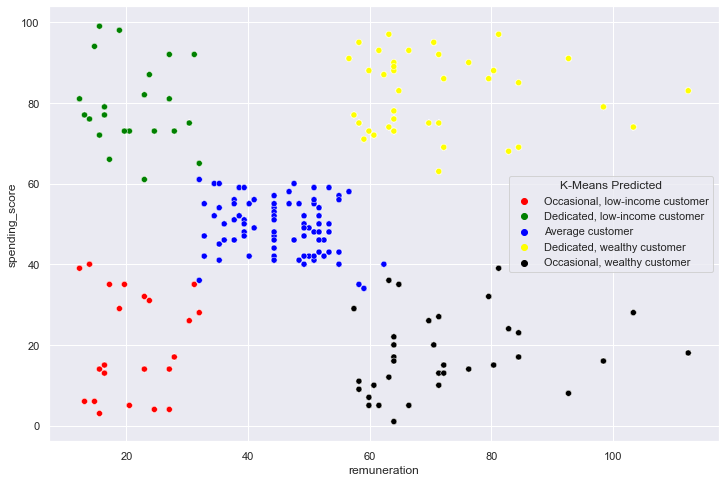

In [114]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=X,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'black'])

# save the plot at 150 DPI
plt.savefig('Customer_clusters.png', dpi=150)

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [115]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [116]:
# Keep necessary columns. Drop unnecessary columns.
df3 = rw[['review','summary']]


# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [117]:
# Determine if there are any missing values.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


no missing values

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [118]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower().str.join('')

In [119]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower().str.join('')

In [120]:
df3.info()
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it whe...,super fun
1997,great game for all.........\nkeeps the mind ni...,great game
1998,fun game!,four stars


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [121]:
# Replace all the punctuations in review column.
# Remove punctuation.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# view the output
df3.head()


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fil...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [122]:
# Remove punctuation in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# view the output
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [123]:
# Check the number of duplicate values in review & summary columns
print(df3.review.duplicated().sum())
print(df3.summary.duplicated().sum())


50
649


In [124]:
# Drop duplicates.
df3 = df3.drop_duplicates(subset=['review'])

# Preview data.
df3.reset_index(inplace=True)

In [125]:
# Drop duplicates.
df3 = df3.drop_duplicates(subset=['summary'])

# Preview data.
df3.reset_index(inplace=True)

In [126]:
print(df3.summary.duplicated().sum())
print(df3.info())
df3.head()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_0  1349 non-null   int64 
 1   index    1349 non-null   int64 
 2   review   1349 non-null   object
 3   summary  1349 non-null   object
dtypes: int64(2), object(2)
memory usage: 42.3+ KB
None


,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [127]:
# Drop those two columns (level_0 & index).
df3 = df3[['review','summary']]

In [128]:
#view the df
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1344,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1345,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1346,great game to keep the mind active we play it...,great game to keep the mind active
1347,we are retired and find this a great way to st...,a great mind game



## 3. Tokenise and create wordclouds

In [129]:
import nltk

# Create new DataFrame (copy DataFrame).
df4 = df3

# Download NLTK data
nltk.download('punkt')

# Apply tokenization to 'review' column
df4['review'] = df4['review'].apply(lambda x: nltk.word_tokenize(x.lower()))

# Apply tokenization to 'summary' column
df4['summary'] = df4['summary'].apply(lambda x: nltk.word_tokenize(x.lower()))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\loic.lombard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [130]:
# view the dataframe
print(df4.head(5))

                                              review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                             summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]  


In [131]:
#import the right libraries
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

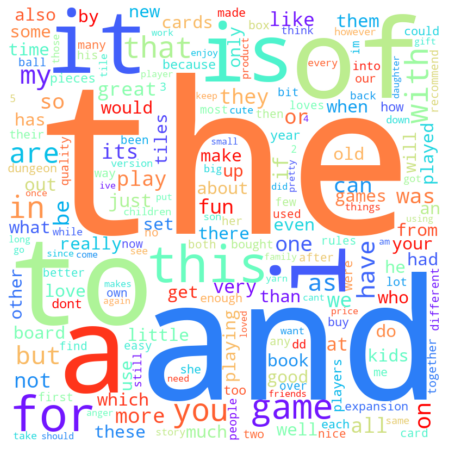

In [132]:
# Review: Create a word cloud.
# Join the tokenized words into a single list
words_list = df4['review'].sum()

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      colormap='rainbow').\
                      generate_from_frequencies(frequencies=dict(Counter(words_list)))

# Plot the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

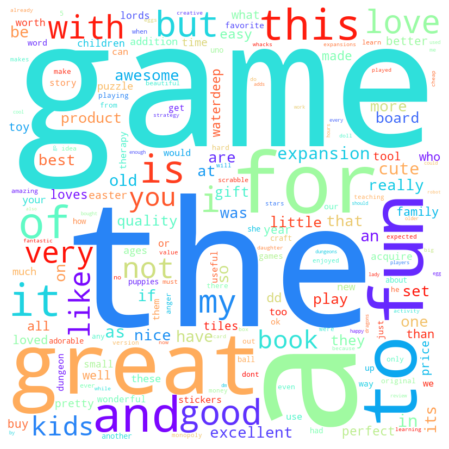

In [133]:
# Summary: Create a word cloud.
# Join the tokenized words into a single list
words_list = df4['summary'].sum()

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      colormap='rainbow').\
                      generate_from_frequencies(frequencies=dict(Counter(words_list)))

# Plot the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [134]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df4['review'][i]

In [135]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [136]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_rw = [word for word in all_tokens if word.isalnum()]

In [137]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df4['summary'][i]

In [138]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [139]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_su = [word for word in all_tokens if word.isalnum()]

### 4b) Remove stopwords

In [140]:
# remove stopwords on review
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_rw_2 = [x for x in tokens_rw if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_rw_string = ''

for value in tokens_rw:
    # Add each filtered token word to the string.
    tokens_rw_string = tokens_rw_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loic.lombard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
# Remove all the stopwords on summary
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_su_2 = [x for x in tokens_su if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_su_string = ''

for value in tokens_su:
    # Add each filtered token word to the string.
    tokens_su_string = tokens_su_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loic.lombard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

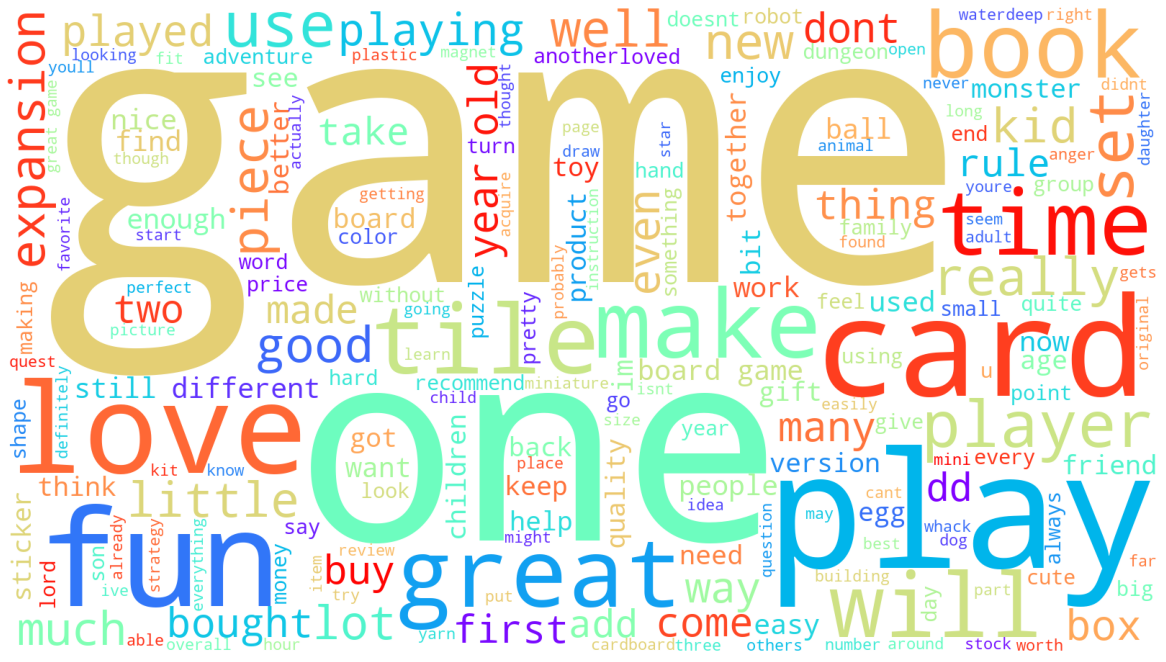

In [142]:
# Review - create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='rainbow', 
                min_font_size = 10).generate(tokens_rw_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

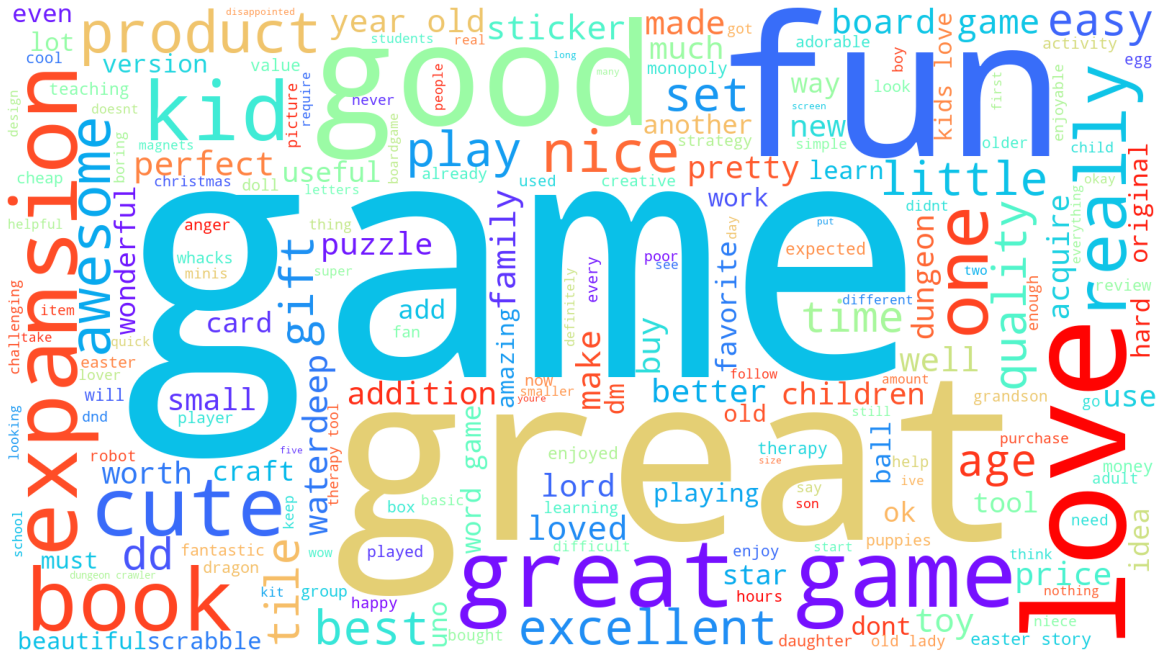

In [143]:
# Summary - create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='rainbow', 
                min_font_size = 10).generate(tokens_su_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [144]:
# Determine the 15 most common words.
fdist_rw = FreqDist(tokens_rw_2)
fdist_su = FreqDist(tokens_su_2)
# merge the two frequency distributions
fdist_all = fdist_rw + fdist_su

# Preview the data.
print(fdist_rw)
print(fdist_su)
print(fdist_all)

<FreqDist with 7073 samples and 51666 outcomes>
<FreqDist with 1440 samples and 4990 outcomes>
<FreqDist with 7224 samples and 56656 outcomes>


In [145]:
tokens_all = tokens_rw_2 + tokens_su_2

In [146]:
# Generate DataFrames for top 15 words in each source
counts_rw = pd.DataFrame(Counter(tokens_rw_2).most_common(15), columns=['Word', 'Frequency'])
counts_su = pd.DataFrame(Counter(tokens_su_2).most_common(15), columns=['Word', 'Frequency'])
counts_all = pd.DataFrame(Counter(tokens_all).most_common(15), columns=['Word', 'Frequency'])

# Add prefixes to the column names
counts_rw = counts_rw.add_prefix('rw_')
counts_su = counts_su.add_prefix('su_')
counts_all = counts_all.add_prefix('all_')

# Combine the two DataFrames
df_top15 = pd.concat([counts_rw, counts_su, counts_all], axis=1)
# view the dataframe
df_top15

,rw_Word,rw_Frequency,su_Word,su_Frequency,all_Word,all_Frequency
0,game,1359,game,268,game,1627
1,one,475,great,236,great,627
2,play,442,fun,175,fun,582
3,fun,407,good,84,one,503
4,great,391,love,70,play,468
5,like,373,like,54,like,427
6,get,293,kids,48,good,312
7,cards,281,book,42,really,308
8,tiles,280,expansion,42,get,307
9,really,278,cute,40,love,305


In [147]:
# determine polarity of rw and su
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each review comment.
rw['polarity_rw'] = rw['review'].apply(generate_polarity)

# Populate a new column with polarity scores for each summary comment.
rw['polarity_su'] = rw['summary'].apply(generate_polarity)

# Merge the "review" and "summary" columns into a new column called "merged"
rw['merged'] = rw.apply(lambda row: row['review'] + ' ' + row['summary'], axis=1)

# Calculate the polarity of the merged column using TextBlob
rw['polarity_all'] = rw['merged'].apply(lambda x: TextBlob(x).sentiment.polarity)

# rearrange columns
rw = rw[['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
         'education', 'product', 'review', 'summary', 'merged',
         'polarity_rw', 'polarity_su', 'polarity_all']]

# Preview the result.
rw.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,merged,polarity_rw,polarity_su,polarity_all
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,"When it comes to a DM's screen, the space on t...",-0.036111,0.15,-0.002273
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,An Open Letter to GaleForce9*:\n\nYour unpaint...,0.035952,-0.80,-0.003855
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless","Nice art, nice printing. Why two panels are f...",0.116640,0.00,0.109033
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,Amazing buy! Bought it as a gift for our new d...,0.628788,0.00,0.628788
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,As my review of GF9's previous screens these w...,-0.316667,0.00,-0.316667


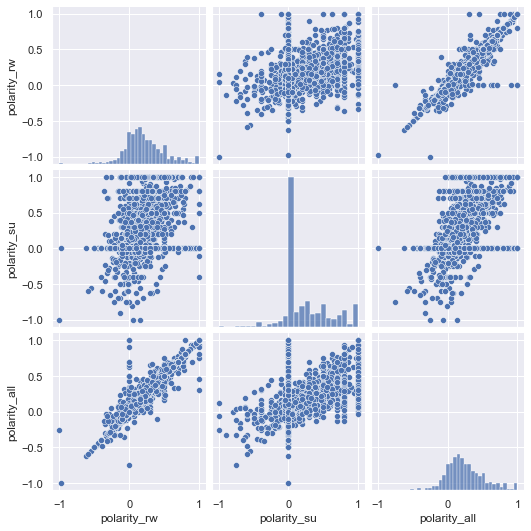

In [148]:
#Visually compare & assess polarities of rw/su and merged
import seaborn as sns

# Subset the DataFrame to only the columns starting with "polarity".
polarity_cols = [col for col in rw.columns if col.startswith('polarity')]
polarity_df = rw[polarity_cols]

# Use Seaborn's pairplot function to create the scatter plot matrix.
sns.pairplot(polarity_df)

There is good correlation between reivew/summary and combined (polarity_all) calculated polarity. The regression line almost drwas itself by the data in a nice, 45 degree regression line angle. Most pronounced between Review and all, which is not surprising, since we have a large overlap in words and less with the summary, because there are just less words in summary. **Conclusion:** the general sentiment can be trusted as an indication. It should serve as a variable to validate and confirm marketing measures, however, not originate them. 

Lets look at the vader sentiment library to contextualise/confirm the polarity analysis done with the textblob library:


### 4e) Check review/summery sentiment and compare it with polarity outcomes 

In [149]:
# Install vaderSentiment tool.
!pip install vaderSentiment

# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()


# Apply the polarity scores function to each review and summary in the rw DataFrame
sentiment_scores = rw[['review', 'summary']].applymap(sia.polarity_scores)

# Extract the compound polarity score from the sentiment scores dictionary for each review and summary
polarity_scores = sentiment_scores.applymap(lambda x: x['compound'])

# Add the new columns to the rw DataFrame
rw['review_sentiment'] = polarity_scores['review']
rw['summary_sentiment'] = polarity_scores['summary']



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
# View the output
rw.head(5)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,merged,polarity_rw,polarity_su,polarity_all,review_sentiment,summary_sentiment
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,"When it comes to a DM's screen, the space on t...",-0.036111,0.15,-0.002273,-0.6333,-0.0711
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,An Open Letter to GaleForce9*:\n\nYour unpaint...,0.035952,-0.80,-0.003855,0.9404,-0.4404
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless","Nice art, nice printing. Why two panels are f...",0.116640,0.00,0.109033,-0.8334,0.4019
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,Amazing buy! Bought it as a gift for our new d...,0.628788,0.00,0.628788,0.8997,0.0000
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,As my review of GF9's previous screens these w...,-0.316667,0.00,-0.316667,-0.6808,-0.3182


In [151]:
# create a new uncluttered df to visually analyze the sentiment analyses
viz_sentiment = rw[['review', 'summary','polarity_rw','polarity_su','review_sentiment','summary_sentiment']]
viz_sentiment.head()

,review,summary,polarity_rw,polarity_su,review_sentiment,summary_sentiment
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,-0.036111,0.15,-0.6333,-0.0711
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,0.035952,-0.80,0.9404,-0.4404
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",0.116640,0.00,-0.8334,0.4019
3,Amazing buy! Bought it as a gift for our new d...,Five Stars,0.628788,0.00,0.8997,0.0000
4,As my review of GF9's previous screens these w...,Money trap,-0.316667,0.00,-0.6808,-0.3182


In [152]:
#Check correlation of analsises: 
corr_rw = viz_sentiment['polarity_rw'].corr(viz_sentiment['review_sentiment'])
corr_su = viz_sentiment['polarity_su'].corr(viz_sentiment['summary_sentiment'])

print(f"The correlation between textblob and vader libraries analysis for Review: {corr_rw}, Summary: {corr_su}")

The correlation between textblob and vader libraries analysis for Review: 0.3280008691285936, Summary: 0.6544078400300428


At this point, visual analysis will guide our decision making based on reviews/language sentiment analysis most heavily. While visual analysis is not precise it still provides us with quick and broad feedback that is valuable. Numerical or statistically advanced methods are employed with highly precise data (medical, demographic, marketing), NLP is considered imprecise due to the complexity in interpreting written language/speech. 

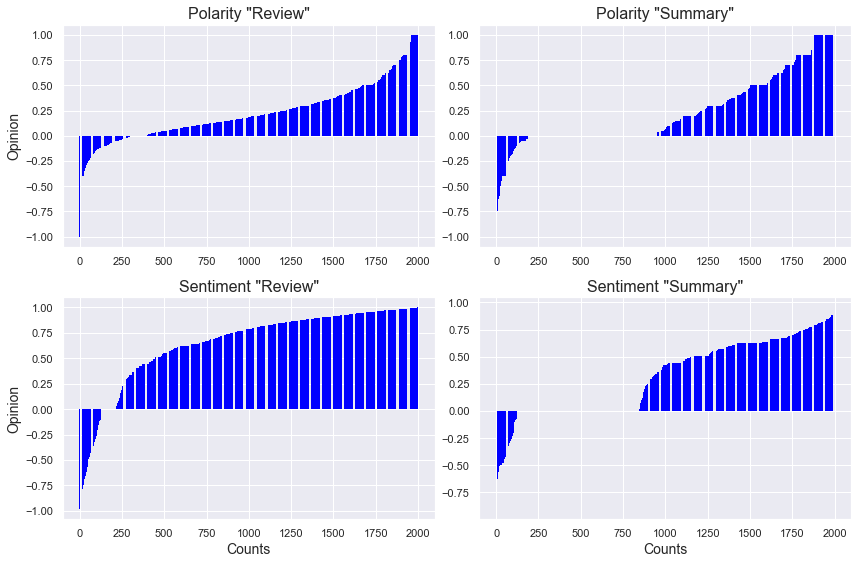

In [155]:
import matplotlib.pyplot as plt

# Sort values for the column
polarity_rw_sorted = viz_sentiment['polarity_rw'].sort_values()
polarity_su_sorted = viz_sentiment['polarity_su'].sort_values()
review_sentiment_sorted = viz_sentiment['review_sentiment'].sort_values()
summary_sentiment_sorted = viz_sentiment['summary_sentiment'].sort_values()

# Create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Polarity Review
axes[0, 0].bar(range(len(polarity_rw_sorted)), polarity_rw_sorted, color='blue', edgecolor='none')
axes[0, 0].set_title('Polarity "Review"', fontsize=16)
axes[0, 0].set_ylabel('Opinion', fontsize=14)

# Plot 2: Polarity 'Summary'
axes[0, 1].bar(range(len(polarity_su_sorted)), polarity_su_sorted, color='blue', edgecolor='none')
axes[0, 1].set_title('Polarity "Summary"', fontsize=16)

# Plot 3: Sentiment Review
axes[1, 0].bar(range(len(review_sentiment_sorted)), review_sentiment_sorted, color='blue', edgecolor='none')
axes[1, 0].set_title('Sentiment "Review"', fontsize=16)
axes[1, 0].set_ylabel('Opinion', fontsize=14)
axes[1, 0].set_xlabel('Counts', fontsize=14)

# Plot 4: Sentiment SU
axes[1, 1].bar(range(len(summary_sentiment_sorted)), summary_sentiment_sorted, color='blue', edgecolor='none')
axes[1, 1].set_title('Sentiment "Summary"', fontsize=16)
axes[1, 1].set_xlabel('Counts', fontsize=14)

# Set the layout tight
plt.tight_layout()

# Save the plot at 150 DPI.
plt.savefig('reviews_sentiment.png', dpi=150)

# Show the plot
plt.show()


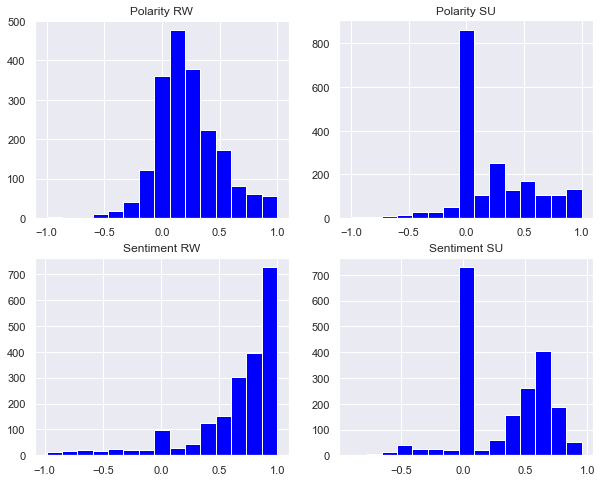

In [156]:
# Create histograms for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].hist(polarity_rw_sorted, color='blue', bins=15)
axs[0, 0].set_title('Polarity RW')
axs[0, 1].hist(polarity_su_sorted, color='blue', bins=15)
axs[0, 1].set_title('Polarity SU')
axs[1, 0].hist(review_sentiment_sorted, color='blue', bins=15)
axs[1, 0].set_title('Sentiment RW')
axs[1, 1].hist(summary_sentiment_sorted, color='blue', bins=15)
axs[1, 1].set_title('Sentiment SU')

plt.show()


Comparing both sentiment analysis libraries textblob and vader sentiment, we see that they are alinged in overall sentiment, but also distribution - with minor digression. This point is strong evidence that in bulk, we can trust the sentiment and that it is a positive one. Due to the crudeness of the tools (pre.trained libraries, rudimentary language models), we still need to be careful for what we consider this insight. Hence the sentiment analysis should mainly be used as diagnostic but not prescriptive tool.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

see above

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [157]:
# Sort the reviews and summaries by sentiment score
sorted_reviews = viz_sentiment.sort_values('review_sentiment', ascending=False)
sorted_summaries = viz_sentiment.sort_values('summary_sentiment', ascending=False)

# Get the top 20 positive and negative reviews and summaries
top_pos_reviews = sorted_reviews.head(20)
top_neg_reviews = sorted_reviews.tail(20)
top_pos_summaries = sorted_summaries.head(20)
top_neg_summaries = sorted_summaries.tail(20)


In [158]:
# View Top 20 positive reviews.
# Set the option to display longer strings.
pd.set_option('display.max_colwidth', 100)

# View output
top_pos_reviews


,review,summary,polarity_rw,polarity_su,review_sentiment,summary_sentiment
1121,"Disclaimer: Bought this from a local store. Paid list value, but supporting local game stores he...",Wrath of Ashardalon: great investment for an avid RPG fan who enjoys tabletop as well as CRPGs,0.098638,0.525000,0.9996,0.9186
879,"Whenever I see this game on my shelf, I get a disturbing visual of Quark's big head from Star Tr...",Acquire Review by Dad's Gaming Addiction,0.058882,0.000000,0.9994,0.0000
1666,"If you only employ one creativity-enhancing resource for the rest of your life, make that resour...",An Epochal Innovation Breakthrough!,0.178785,0.000000,0.9992,0.4389
358,"This kit is AWESOME! My 5-year old daughter and I made the chihuahua dog first, and it came out ...",Easy! Finished product as cute as the cover!,0.340643,0.583333,0.9992,0.7568
1570,As a dad of two boys Im always on the lookout for activities for us to do together. Something w...,"Hobbits love telling tales, so do I",0.095337,0.500000,0.9991,0.6369
857,"I grew up playing Monopoly. Lots of people did. It's unfortunate, because there was this gem j...","Acquire, the game you SHOULD be playing instead of Monopoly",0.176914,-0.400000,0.9988,0.2023
1295,"Lords of Waterdeep was awesome, and Scoundrels of Skullport makes it even bigger, better, and cr...",Updated Review: Waterdeep on steroids!,-0.012628,0.000000,0.9985,0.0000
1357,Lords of Waterdeep: Scoundrels of Skullport is an expansion for the original Lords of Waterdeep ...,Take your Lords of Waterdeep games to a new level.,0.101209,0.136364,0.9984,0.0000
1063,"If you are a fan of Dungeons and Dragons or other adventure/exploration games, you should defini...",Why haven't you bought this already?!,0.048994,0.000000,0.9979,0.0000
1073,We own this game as well as Castle Ravenloft. Once we adjusted to the scant rulebook in CR (it ...,A Solid Experience for D&D Light,0.110737,0.200000,0.9975,0.1531


In [136]:
# View Top 20 negative reviews.
top_neg_reviews

,review,summary,polarity_rw,polarity_su,review_sentiment,summary_sentiment
1123,"The product description specifies that this product ""contains 50 miniatures"" BUT THIS IS FALSE.-...",Not as described,-0.207778,0.000000,-0.7838,0.0000
1069,For those just getting started in the DnD world or those who haven't played DnD in years if not ...,Fun and easy to learn,0.069391,0.366667,-0.7841,0.7351
593,If I could give this egg zero stars I would. It is poorly made and rudiculously hard to open. Wh...,Too hard for children or adults to open,-0.236458,-0.145833,-0.7845,-0.1027
1332,Not a hard game to learn but not easy to win.,Five Stars,0.082292,0.000000,-0.7946,0.0000
426,"It's Uno with questions about anger. It's an okay way to discuss anger, but it gets repetitive a...",but it gets repetitive and the students start to get bored after about half a round,-0.288095,-0.279167,-0.8126,-0.6310
363,I found that this card game does the opposite of what it was intended for. It actually has the k...,Promotes anger instead of teaching calming methods,-0.126190,-0.700000,-0.8179,0.1027
247,It's really annoying because when you click the pink things together it won't stay together so i...,It's really annoying because when you click the pink things together it ...,-0.350000,-0.450000,-0.8211,-0.4576
2,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyon...","pretty, but also pretty useless",0.116640,0.000000,-0.8334,0.4019
359,This is horrible! The directions are very hard for a child to read and comprehend themselves. Th...,Not worth the money!,-0.237083,-0.187500,-0.8347,-0.2401
1670,"I thought I was getting a new product, but the box had obviously been opened (and product possib...",Not as expected,0.147273,-0.100000,-0.8518,0.0000


In [160]:
# Top 20 positive summaries.
# View output.
top_pos_summaries


,review,summary,polarity_rw,polarity_su,review_sentiment,summary_sentiment
1201,"I ordered this as a ""what the heck"" buy, since I've never had tiles before, I wasn't sure if I w...",Wow! What a great set of tiles for such a great price. A great starter set.,0.294000,0.505000,0.9596,0.9545
1699,I've purchased a couple sets of these for workshops and training sessions. It's a wonderful toy ...,"Great for playing, great for creative workshops too!",0.600000,0.741667,0.9705,0.9215
1121,"Disclaimer: Bought this from a local store. Paid list value, but supporting local game stores he...",Wrath of Ashardalon: great investment for an avid RPG fan who enjoys tabletop as well as CRPGs,0.098638,0.525000,0.9996,0.9186
1955,"First, the artwork on these cars is stupendous. And as quick, easy to learn games go, it's great.","Easy to learn, great fun to play!",0.454167,0.536111,0.7906,0.9184
1872,"This is a GREAT game for 2 players or more. I ordered it, because I played it and loved it at a...","Easy, FUN!, fast and thoroughly enjoyable for adults as well as kids age eight and above.",0.220000,0.301667,0.9471,0.9103
1543,Grand daughter loves stickers and she loves Peppa so this was perfect..,... loves stickers and she loves Peppa so this was perfect..,0.750000,1.000000,0.9367,0.9074
703,"Great quality, very cute and perfect for my toddler!","Great quality, very cute and perfect for my toddler",0.816667,0.816667,0.9127,0.9073
491,"cards a little too big, but the kids really like it and helps start good discussion",but the kids really like it and helps start good discussion,0.178125,0.450000,0.8988,0.8988
1845,I love this game! it is engaging for all but perhaps the youngest grades of readers. The artwork...,"Fun, friendly, beautiful game!",0.132857,0.256250,0.9583,0.8932
1029,"Other reviews go into the specs of what's in the box, so I'm gonna keep this review opinionated....","Great game, great value.",0.178471,0.400000,0.9922,0.8910


In [161]:
# Top 20 negative summaries.
# View output.
top_neg_summaries

,review,summary,polarity_rw,polarity_su,review_sentiment,summary_sentiment
662,Great puzzles for toddlers to put together by themselves. The puzzle itself is not the best qual...,Not the best quality.,0.533333,1.000000,0.1857,-0.5216
1530,"The stickers were very cute, and my three-year-old daughter love them. But as far as stickers go...","Very cute, but poor quality stickers",0.341667,0.125000,-0.0482,-0.5266
890,"The game tiles, board, and tile stands are all made of paper. After using few times it will not ...",Bad Quality-All made of paper,-0.162500,-0.700000,-0.4939,-0.5423
885,I guess I did not look closely to the information on this game. I had the impression that it was...,"Too bad, this is not what I was expecting.",0.200000,-0.700000,0.7351,-0.5423
504,"Great way to start a conversation, identify triggers, build self-awareness, critically think abo...",It's UNO for the angry!,0.333333,-0.625000,0.7717,-0.5562
788,Everything is cardboard and the 500's and 5000 dollar bills are almost identical in color. Prepa...,"Great game, but lazy and boring board design.",0.216667,-0.212500,0.8316,-0.5647
75,They were ok but not really considered it a book. Really small disappointed!,Really small disappointed!,-0.196875,-0.593750,-0.6439,-0.5676
1476,"The base game is great, and I will always be up for a game. Waterdeep is a lush fantasy city, an...",Adds a (needed) amount of tension in a tense fantasy world.,-0.038889,-0.333333,0.5927,-0.5719
530,My 12 year old son enjoyed the game - but it is hard convincing him to play. Time will tell if s...,Anger Control Game,0.151042,-0.550000,0.9224,-0.5719
364,"One of my staff will be using this game soon, so I don't know how well it works as yet, but afte...",Anger Control game,-0.550000,-0.550000,-0.4131,-0.5719


## 7. Discuss: Insights and observations

***Your observations here...***

Comparing both sentiment analysis libraries textblob and vader sentiment, we see that they are alinged in overall sentiment, but also distribution - with minor digression. This point is strong evidence that in bulk, we can trust the sentiment and that it is a positive one. Due to the crudeness of the tools (pre.trained libraries, rudimentary language models), we still need to be careful for what we consider this insight. Hence the sentiment analysis should mainly be used as diagnostic but not prescriptive tool.

To ameliorate the insight it would be useful to group the comments by title and compare that with other metrics that we have (star rating?), that could give us more confidence in what our clients are thiking about the title.

# 